<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/SISPAD_3D_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Datasets


In [158]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [159]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [160]:
# data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
# data.head(20)

# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [161]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [162]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])
data['log_scaled_pw'] = np.log(data['pw'])

In [163]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread,log_scaled_pw
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375,-17.727534
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857,-17.727534
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866,-17.727534
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148,-17.727534
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728,-17.727534
5,10,2.000000e-08,0.5,3.0,0.000010,0.000011,0.01,0.053194,0.055399,-17.727534
6,12,2.000000e-08,0.6,0.5,0.000022,0.000020,0.01,0.112064,0.101366,-17.727534
7,14,2.000000e-08,0.6,1.0,0.000010,0.000007,0.01,0.051746,0.034154,-17.727534
8,16,2.000000e-08,0.6,1.5,0.000005,0.000013,0.01,0.024402,0.067529,-17.727534
9,18,2.000000e-08,0.6,2.0,0.000174,0.000178,0.01,0.903011,0.910478,-17.727534


### Train Test Split
Here, we make a 75%-25% split of the data into training and testing datasets

In [164]:
# Train-test 75%-25% split
x = data[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [165]:
print(x,"\n",y)

[[0.03431788 0.01       0.5        0.5       ]
 [0.04190577 0.01       0.5        1.        ]
 [0.040792   0.01       0.5        1.5       ]
 ...
 [0.05514082 0.01       0.5        3.        ]
 [0.07995579 0.01       0.6        0.5       ]
 [0.05964901 0.01       0.6        1.        ]] 
 [0.04437516 0.04085697 0.04786639 ... 0.07144795 0.06633775 0.04164925]


###Standard Data Fitting Model

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [167]:
#  def generate_data(n_samples):
#     epsilon = np.random.normal(size=(n_samples))
#     x_data = np.random.uniform(-10.5, 10.5, n_samples)
#     y_data = 7*np.sin(0.75*x_data) + 0.5*x_data + epsilon
#     return x_data, y_data

# n_samples = 9831
# x_data, y_data = generate_data(n_samples)
# print(type(x_data))

n_samples = 32768

In [168]:
n_input = 4
n_hidden = 20
n_output = 1

hidden = nn.Linear(n_input, n_hidden)
hidden.weight.data.fill_(0.01)

network = nn.Sequential(hidden,
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_output))
network = network.cuda()

In [169]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(network.parameters())

In [170]:
X_train

array([[0.05667327, 0.5       , 2.3       , 1.5       ],
       [0.0324172 , 0.1       , 3.1       , 0.5       ],
       [0.05935437, 0.5       , 1.        , 1.        ],
       ...,
       [0.04290688, 0.2       , 2.8       , 1.5       ],
       [0.05041831, 0.1       , 2.7       , 2.        ],
       [0.14262499, 0.5       , 1.7       , 1.5       ]])

In [171]:
type(x)

numpy.ndarray

In [172]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

###MDN

In [173]:
class MDN(nn.Module):
    def __init__(self, n_hidden, n_gaussians):
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
            nn.Linear(4, n_hidden),
            nn.Tanh()
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)

    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        return pi, sigma, mu

In [174]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2.0*np.pi) # normalization factor for Gaussians
def gaussian_distribution(y, mu, sigma):
    # make |mu|=K copies of y, subtract mu, divide by sigma
    print(y.shape)
    print(mu.shape)
    print(sigma.shape)
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    print(result.shape)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    #result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [175]:
network = MDN(n_hidden=10, n_gaussians=1)
network = network.cuda()
optimizer = torch.optim.Adam(network.parameters())

In [176]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [177]:
len(y_train)

24576

In [178]:
batch_size = 64
num_batches = int(len(y_train)/batch_size)
# network.fit(X_train, y_train, epochs=300, )

In [179]:
torch.cuda.empty_cache()

In [180]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [181]:
def train_mdn():
    for epoch in range(5000):
      # for batch in range(num_batches):
        pi_variable, sigma_variable, mu_variable = network(x_train_variable.float())
        loss = mdn_loss_fn(pi_variable[:,0], sigma_variable[:,0], mu_variable[:,0], y_train_variable)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(epoch, loss.data)

train_mdn()

Streaming output truncated to the last 5000 lines.
torch.Size([24576])
torch.Size([24576])
tensor(-1.4493, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
4000 tensor(-1.4493, device='cuda:0', dtype=torch.float64)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.4493, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.4492, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.4493, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.4493, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.4494, device='cuda:0', dtype=torch.float64, g

In [182]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0547],
        [0.0478],
        [0.0649],
        ...,
        [0.0598],
        [0.0929],
        [0.0795]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.8209],
        [0.8571],
        [0.7288],
        ...,
        [0.1142],
        [0.6605],
        [0.7626]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [183]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0050, device='cuda:0', dtype=torch.float64)
0.0708528794256624


In [184]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.0756], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.9914], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.0076, device='cuda:0', dtype=torch.float64)
tensor(0.9997, device='cuda:0', dtype=torch.float64)
8192
8192


In [185]:
mu_variable[:,0]

tensor([0.8209, 0.8571, 0.7288,  ..., 0.1142, 0.6605, 0.7626], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [186]:
print((mu_variable[:,0]-y_test_tensor).shape)

torch.Size([8192])


<ipython-input-187-d94066c6bc1a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


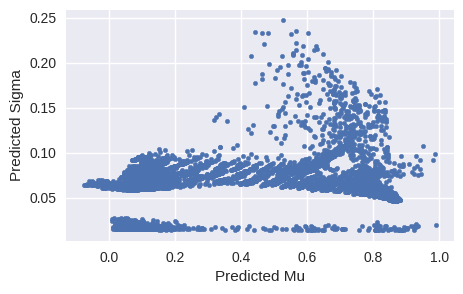

In [187]:
plt.style.use('seaborn')
plt.figure(figsize=(5,3))
# plt.title("Predicted Mu vs Predicted Sigma")
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=10);

In [188]:
pred_cond = mu_variable.cpu().detach().numpy()[:,0]
sigma = sigma_variable.cpu().detach().numpy()[:,0]
real_cond = y_test_tensor.cpu().detach().numpy()
parameter_data = x_test_tensor.cpu().detach().numpy()
print(parameter_data)

[[0.05662796 0.02       2.9        2.5       ]
 [0.05354097 0.2        3.3        3.        ]
 [0.03979135 0.5        1.8        2.        ]
 ...
 [0.061712   0.1        1.3        1.        ]
 [0.05602399 0.5        2.7        1.5       ]
 [0.18994028 0.05       3.1        2.        ]]


In [189]:
z_pred = []
z_real = []
subset = np.array([[0, 0, 0, 0]])
for i in range(8192):
  # pulse width = 1e-7 = 100ns
  if (np.abs(parameter_data[:,1][i]) == 0.1):
    # lowest 50% of preread conductance values
    # switch 0.0605 to 0.04426 for lowest 25%
    if (np.abs(parameter_data[:,0][i]) <= 0.0605):
      newrow = np.abs(parameter_data[i])
      subset = np.vstack([subset, newrow])
      z_pred.append(pred_cond[i])
      z_real.append(real_cond[i])
subset = np.delete(subset, 0, 0)

In [190]:
vwl = subset[:,2]
vbsl = subset[:,3]

In [191]:
# get distributions --> 10 pts for each (mu, sigma)
dist = []
for i in range(len(pred_cond)):
  dist.append(np.random.normal(loc=pred_cond[i], scale=sigma[i], size=(10)))

# adjust vwl and vbsl lengths for the 10 dist points per (vwl, vbsl)
temp = []
vwl_longer = []
vbsl_longer = []
for i in range(len(vwl)):
  temp = [vwl[i]] * 10
  vwl_longer.append(temp)
  temp = [vbsl[i]] * 10
  vbsl_longer.append(temp)

In [192]:
# turn 2D arrays into 1D to feed scatter in next cell
x_final = []
y_final = []
z_final = []
for i in range(len(vwl)):
  for j in range(10):
    x_final.append(vwl_longer[i][j])
    y_final.append(vbsl_longer[i][j])
    z_final.append(dist[i][j])

<ipython-input-193-8a4ebae3faa4>:12: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 14


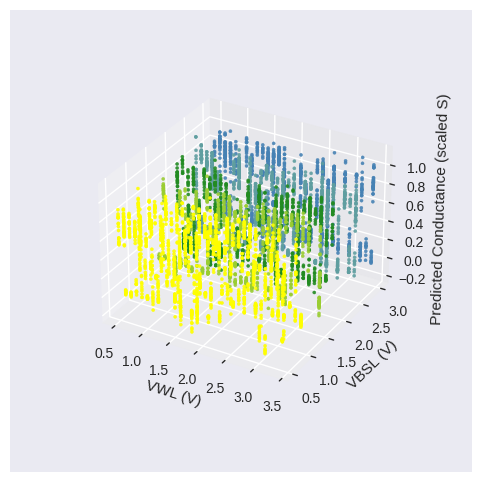

In [193]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('VWL (V)')
ax.set_ylabel('VBSL (V)')
ax.set_zlabel('Predicted Conductance (scaled S)')

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10

ax.dist = 14

color = []
for i in range(len(y_final)):
  if(y_final[i] <= 1):
    color.append('yellow')
  elif(1 < y_final[i] and y_final[i] <= 1.5):
    color.append('yellowgreen')
  elif(1.5 < y_final[i] and y_final[i] <= 2):
    color.append('forestgreen')
  elif(2 < y_final[i] and y_final[i] <= 2.5):
    color.append('cadetblue')
  elif(2.5 < y_final[i] and y_final[i] <= 3):
    color.append('steelblue')
  else:
    color.append('rebeccapurple')


ax.scatter3D(x_final, y_final, z_final, c=color, marker='.', alpha=0.9)

<ipython-input-194-021a5c34cd29>:12: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 14


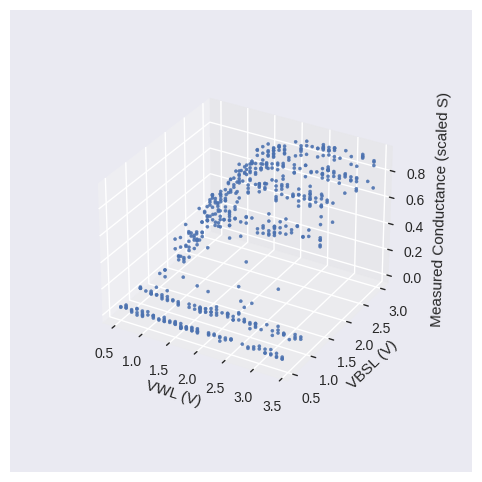

In [194]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('VWL (V)')
ax.set_ylabel('VBSL (V)')
ax.set_zlabel('Measured Conductance (scaled S)')

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10

ax.dist = 14

ax.scatter3D(vwl, vbsl, z_real, marker='.', alpha=0.9)